Connected to particlesystems (Python 3.9.13)

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 0.25
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(0) for j in range(0)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

ValueError: operands could not be broadcast together with shapes (100,100,1,2) (0,) 

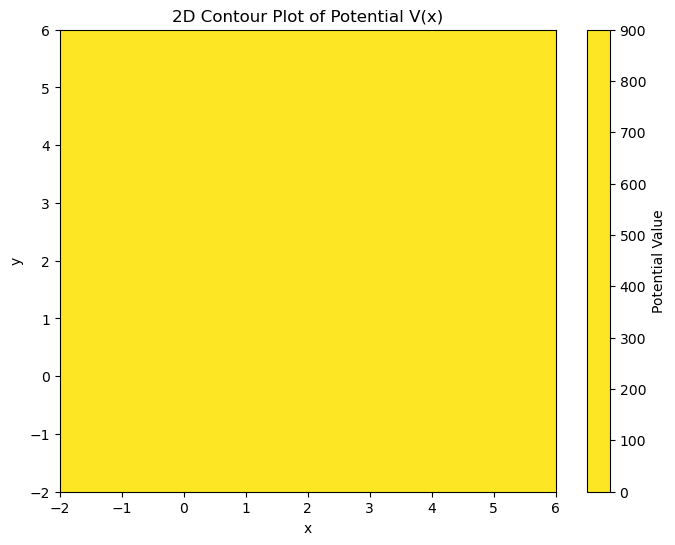

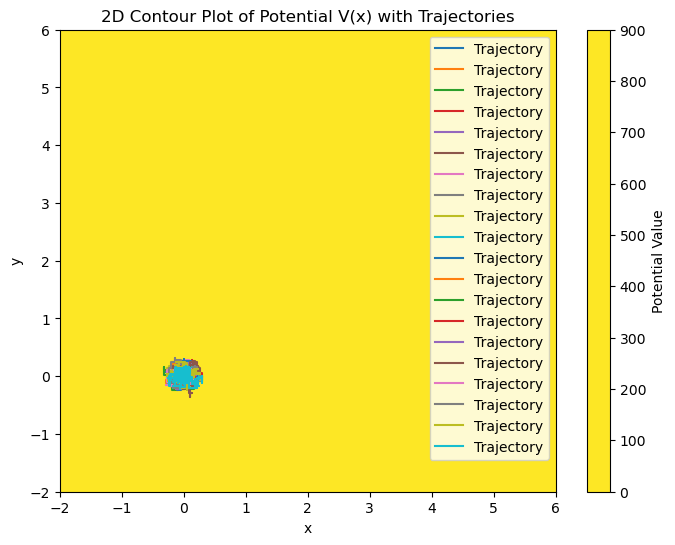

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 0.25
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
D2V(np.array([0,0]))

50.11636431164872

In [ ]:
D2V(np.array([1,1]))

49.99981366873018

In [ ]:
D2V(np.array([20,20]))

4493649.999999999

In [ ]:
D2V(np.array([30,30]))

11358149.999999998

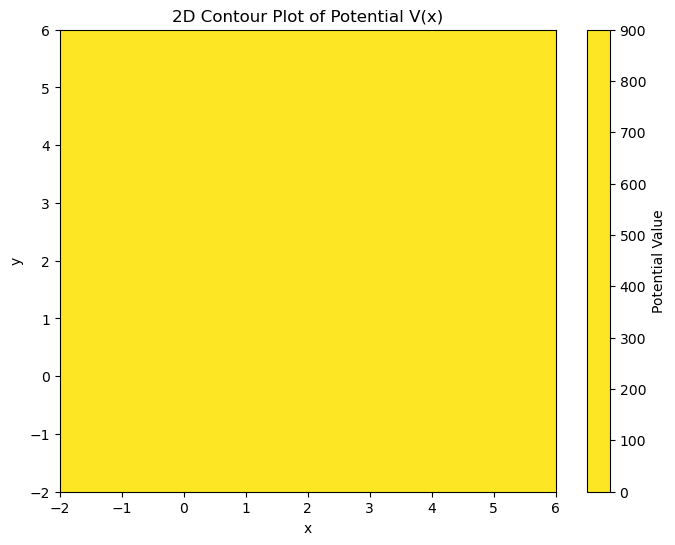

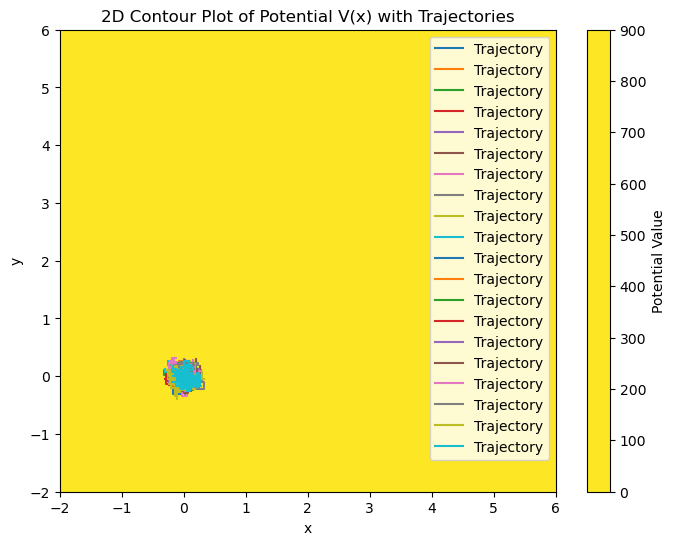

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 0.25
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
D2V(np.array([20,20]))

240049.9999999999

In [ ]:
D2V(np.array([0,0]))

49.99999999999999

In [ ]:
D2V(np.array([10,10]))

60049.99999999998

In [ ]:
D2V(np.array([100,100]))

6000049.999999997

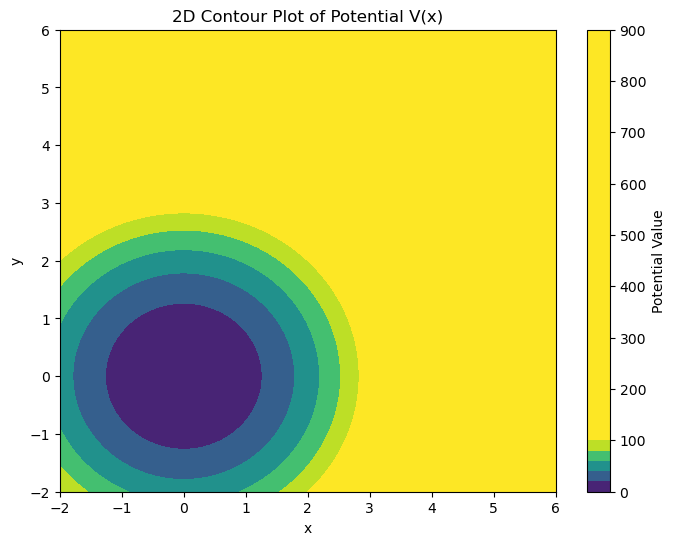

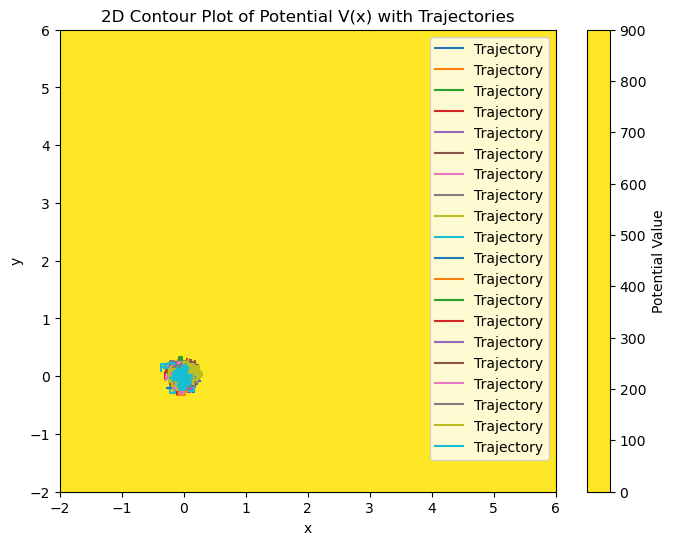

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 0.25
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=100)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
x = np.array([-1,-1])

In [ ]:
    centers = np.array([(i, j) for i in range(1) for j in range(1)])


In [ ]:
centers

array([[0, 0]])

In [ ]:
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)


In [ ]:
distances

array([-25.])

In [ ]:
sigma**2

0.04000000000000001

In [ ]:
1/0.08

12.5

In [ ]:
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))


In [ ]:
weights

array([1.])

In [ ]:
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)


In [ ]:
gradient_term

array([-312.5, -312.5])

In [ ]:
DV(x)

array([-25., -25.])

In [ ]:
x

array([-1, -1])

In [ ]:
1/0.04

25.0

In [ ]:
weights

array([1.])

In [ ]:
-distances

array([25.])

In [ ]:
-distances + np.sum(gradient_term,axis = -1)

array([-600.])

In [ ]:
np.sum(gradient_term,axis= -1)

-624.9999999999998

In [ ]:
gradient_term

array([-312.5, -312.5])

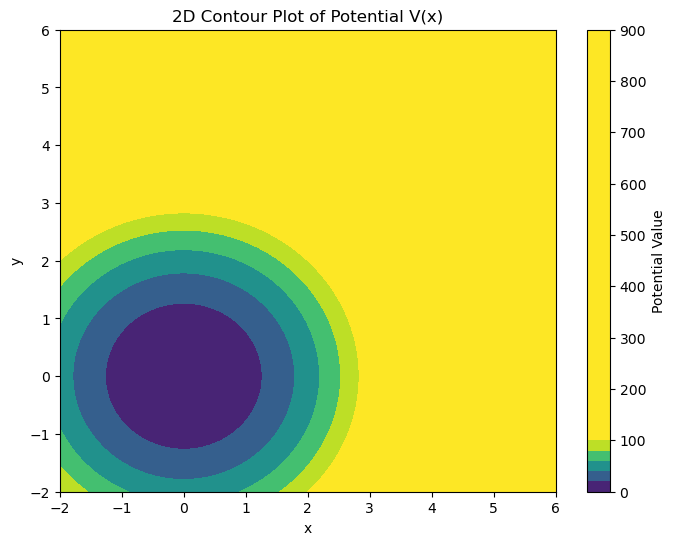

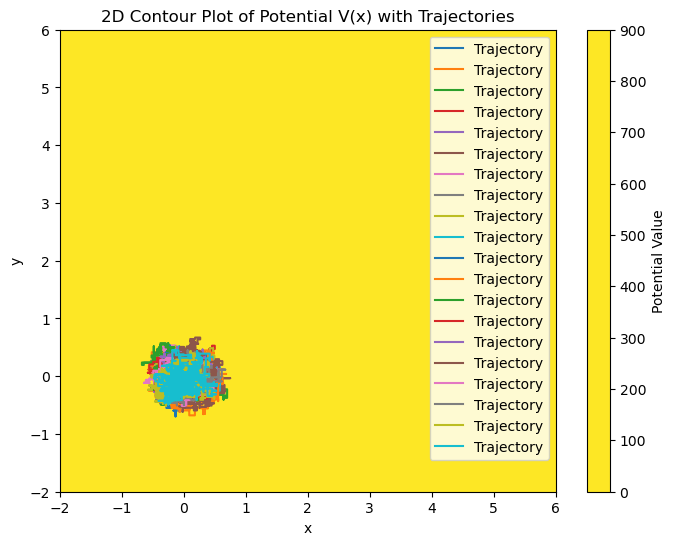

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 1
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(1) for j in range(1)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=100)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
D2V(np.array([-1,-1]))

49.99999999999999

In [ ]:
D2V(np.array([-10,-10]))

49.99999999999999

In [ ]:
D2V(np.array([-100,-100]))

49.99999999999999

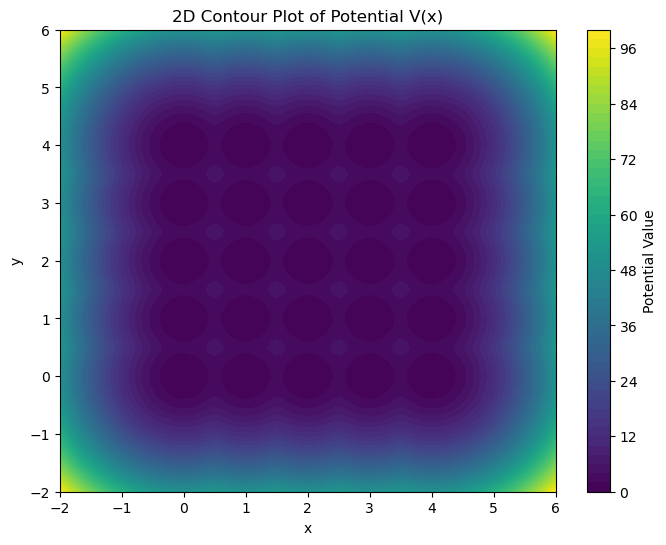

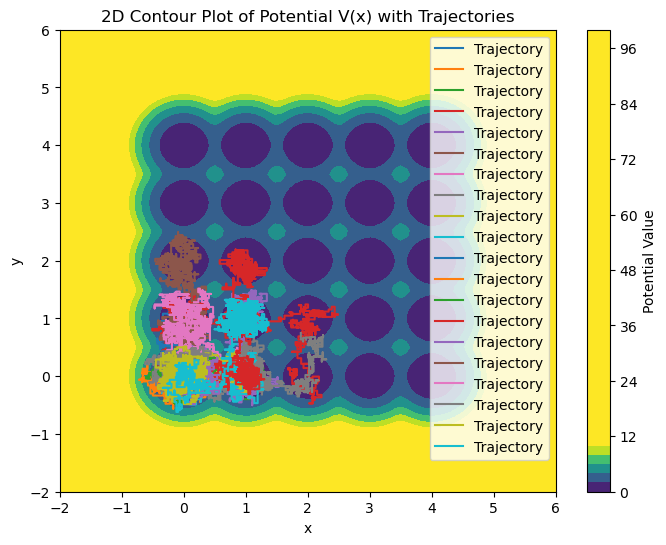

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 1
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=100)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

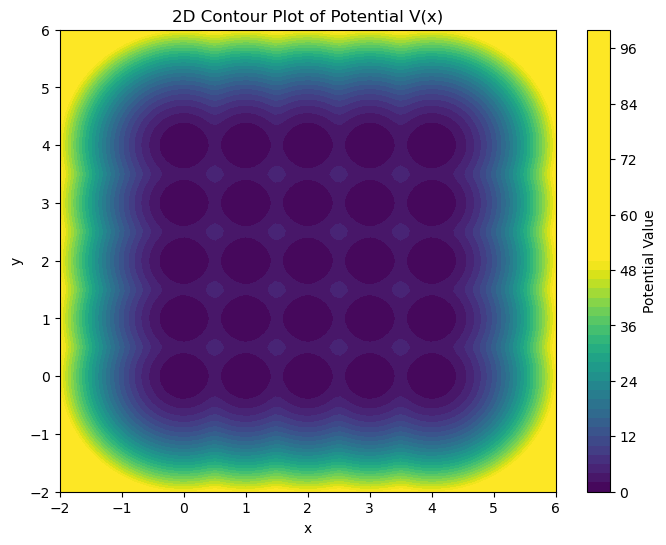

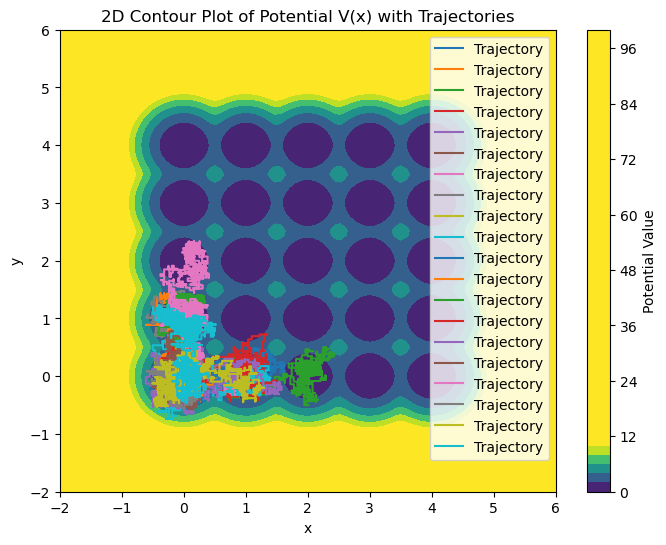

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 1
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / (2 * sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=50)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
D2V(np.array([-100,-100]))

153125049.99999997

In [ ]:
D2V(np.array([-1000,-1000]))

15031250049.999998

In [ ]:
D2V(np.array([-10000,-10000]))

1500312500049.9998

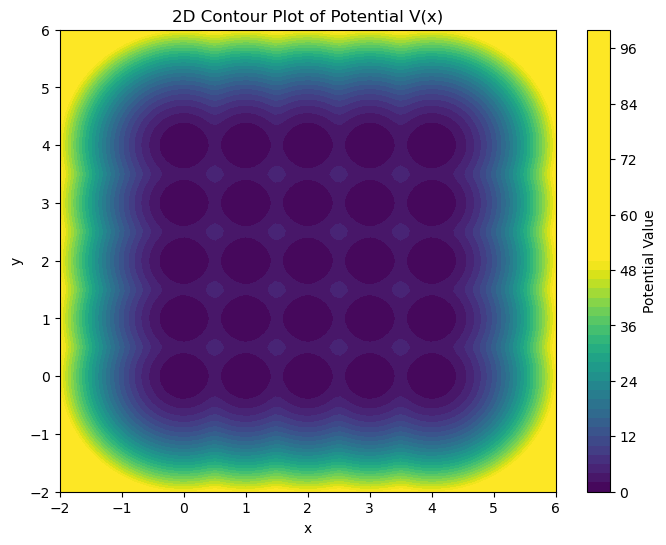

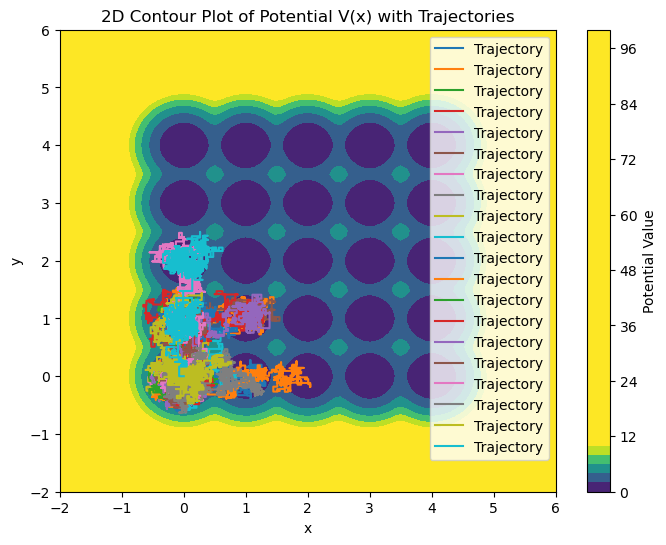

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import utils
importlib.reload(utils)
from utils import sde_transition_rates, one_step_sde, pure_jump_approx_diffusion, fleming_viot, event_rates, inf_swap_rate, killing_cloning, symmetrized_kill_clone_rate, weighted_empirical_measure_functional, empirical_measure_functional
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_periodic_trajectories, plot_periodic_trajectories_list
import os
import json
from scipy.special import logsumexp


T = 1
epsilon = 1
h0 = 0.05
Nparticles = 10



# def periodic_cos(T, epsilon, h0, Nparticles):
# periodic potential problem

sigma = 0.2
dim = 2

def V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    return -logsumexp(distances, axis=-1)  # Use logsumexp for numerical stability


def DV(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the gradient of V (DV)
    gradient = - np.sum(weights[..., None] * (centers - x[..., None, :]) / (sigma ** 2), axis=-2)
    return gradient


def D2V(x):
    centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / ( sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- 2 * distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)
    return laplacian





def a(x): 
    return  2 * epsilon * np.ones_like(x)

def c(x):
    return 0



# Generate a 2D grid for plotting
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.stack([X, Y], axis=-1)

# Compute the potential on the grid
Z = V(grid_points)

# Plot the 2D contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=50)
plt.colorbar(contour, label='Potential Value')
plt.title('2D Contour Plot of Potential V(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dim = 2





initial_positionsx = np.zeros((2 * Nparticles, dim)) 

# Reference simulations
simple_trajectories_times = []
simple_trajectories_x = []

for i in range(2 * Nparticles):
    traj_x, times = pure_jump_approx_diffusion(T, lambda x: -DV(x), a, h0, initial_positionsx[i])
    simple_trajectories_times.append(times)
    simple_trajectories_x.append(traj_x)

# Plot the trajectories on the same plot as the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', vmin=0, vmax=10)
plt.colorbar(contour, label='Potential Value')

for traj in simple_trajectories_x:
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label='Trajectory')

plt.title('2D Contour Plot of Potential V(x) with Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# fig0 = plot_periodic_trajectories_list(simple_trajectories_times, simple_trajectories_x)
# fig0.suptitle(f'Simple Trajectories: T={T}, epsilon={epsilon}, Nparticles={Nparticles}, h0={h0}')

In [ ]:
D2V(np.array([-10000,-10000]))

3000625000049.9995

In [ ]:
D2V(np.array([-1000,-1000]))

30062500049.999996

In [ ]:
D2V(np.array([-100,-100]))

306250049.99999994

In [ ]:
x = np.array([-1,-1])

In [ ]:
centers = np.array([(i, j) for i in range(5) for j in range(5)])
    distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
    weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))
    
    # Compute the Laplacian of V (D2V)
    gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / ( sigma ** 2), axis=-2)
    laplacian = - np.sum(weights * (- 2 * distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)

IndentationError: unexpected indent (<ipython-input-46-aafff950e1c5>, line 2)

In [ ]:
centers = np.array([(i, j) for i in range(5) for j in range(5)])
distances = -np.sum((x[..., None, :] - centers) ** 2, axis=-1) / (2 * sigma ** 2)
weights = np.exp(distances - logsumexp(distances, axis=-1, keepdims=True))

# Compute the Laplacian of V (D2V)
gradient_term = np.sum((centers - x[..., None, :]) * DV(x)[..., None, :] / ( sigma ** 2), axis=-2)
laplacian = - np.sum(weights * (- 2 * distances/(sigma **2) + np.sum(gradient_term, axis=-1) - dim / (sigma ** 2)), axis=-1)

In [ ]:
centers

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

In [ ]:
weights

array([1.00000000e+000, 5.17555501e-017, 3.72007598e-044, 3.71351039e-082,
       5.14820022e-131, 5.17555501e-017, 2.67863696e-033, 1.92534578e-060,
       1.92194773e-098, 2.66447934e-147, 3.72007598e-044, 1.92534578e-060,
       1.38389653e-087, 1.38145408e-125, 1.91516960e-174, 3.71351039e-082,
       1.92194773e-098, 1.38145408e-125, 1.37901594e-163, 1.91178950e-212,
       5.14820022e-131, 2.66447934e-147, 1.91516960e-174, 1.91178950e-212,
       2.65039655e-261])

In [ ]:
gradient_term

array([-46875., -46875.])

In [ ]:
distances/(sigma**2)

array([  -625. ,  -1562.5,  -3125. ,  -5312.5,  -8125. ,  -1562.5,
        -2500. ,  -4062.5,  -6250. ,  -9062.5,  -3125. ,  -4062.5,
        -5625. ,  -7812.5, -10625. ,  -5312.5,  -6250. ,  -7812.5,
       -10000. , -12812.5,  -8125. ,  -9062.5, -10625. , -12812.5,
       -15625. ])

In [ ]:
gradient_term

array([-46875., -46875.])

In [ ]:
 # Compute the Laplacian of V (D2V)
    gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)
    gradient_terms = np.sum(weights[..., None] * gradient_terms, axis=-2)
    laplacian = - np.sum(weights * (- 2 * distances / (sigma ** 2) + np.sum(gradient_terms, axis=-1) - dim / (sigma ** 2)), axis=-1)

IndentationError: unexpected indent (<ipython-input-53-89f6f34eeafb>, line 2)

In [ ]:
 # Compute the Laplacian of V (D2V)
gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)
gradient_terms = np.sum(weights[..., None] * gradient_terms, axis=-2)
laplacian = - np.sum(weights * (- 2 * distances / (sigma ** 2) + np.sum(gradient_terms, axis=-1) - dim / (sigma ** 2)), axis=-1)

In [ ]:
gradient_terms

array([25., 25.])

In [ ]:
 gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)

In [ ]:
gradient_terms

array([[ 25.,  25.],
       [ 25.,  50.],
       [ 25.,  75.],
       [ 25., 100.],
       [ 25., 125.],
       [ 50.,  25.],
       [ 50.,  50.],
       [ 50.,  75.],
       [ 50., 100.],
       [ 50., 125.],
       [ 75.,  25.],
       [ 75.,  50.],
       [ 75.,  75.],
       [ 75., 100.],
       [ 75., 125.],
       [100.,  25.],
       [100.,  50.],
       [100.,  75.],
       [100., 100.],
       [100., 125.],
       [125.,  25.],
       [125.,  50.],
       [125.,  75.],
       [125., 100.],
       [125., 125.]])

In [ ]:
    gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)


In [ ]:
gradient_terms

array([[ 25.,  25.],
       [ 25.,  50.],
       [ 25.,  75.],
       [ 25., 100.],
       [ 25., 125.],
       [ 50.,  25.],
       [ 50.,  50.],
       [ 50.,  75.],
       [ 50., 100.],
       [ 50., 125.],
       [ 75.,  25.],
       [ 75.,  50.],
       [ 75.,  75.],
       [ 75., 100.],
       [ 75., 125.],
       [100.,  25.],
       [100.,  50.],
       [100.,  75.],
       [100., 100.],
       [100., 125.],
       [125.,  25.],
       [125.,  50.],
       [125.,  75.],
       [125., 100.],
       [125., 125.]])

In [ ]:
    laplacian = np.sum(weights * (-np.sum(DV(x) * gradient_terms, axis=-1) - dim / (sigma ** 2)), axis=-1)


In [ ]:
laplacian

1199.9999999999998

In [ ]:
DV(x) * gradient_terms

array([[ -625.,  -625.],
       [ -625., -1250.],
       [ -625., -1875.],
       [ -625., -2500.],
       [ -625., -3125.],
       [-1250.,  -625.],
       [-1250., -1250.],
       [-1250., -1875.],
       [-1250., -2500.],
       [-1250., -3125.],
       [-1875.,  -625.],
       [-1875., -1250.],
       [-1875., -1875.],
       [-1875., -2500.],
       [-1875., -3125.],
       [-2500.,  -625.],
       [-2500., -1250.],
       [-2500., -1875.],
       [-2500., -2500.],
       [-2500., -3125.],
       [-3125.,  -625.],
       [-3125., -1250.],
       [-3125., -1875.],
       [-3125., -2500.],
       [-3125., -3125.]])

In [ ]:
   gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)
    laplacian = -np.sum(weights * (
        -2 * distances / (sigma ** 2) +
        np.sum(DV(x)[..., None, :] * gradient_terms, axis=-1) -
        dim / (sigma ** 2)
    ), axis=-1)

IndentationError: unexpected indent (<ipython-input-63-6d1cc57220f6>, line 2)

In [ ]:
gradient_terms = (centers - x[..., None, :]) / (sigma ** 2)
laplacian = -np.sum(weights * (
    -2 * distances / (sigma ** 2) +
    np.sum(DV(x)[..., None, :] * gradient_terms, axis=-1) -
    dim / (sigma ** 2)
), axis=-1)

In [ ]:
gradient_terms

array([[ 25.,  25.],
       [ 25.,  50.],
       [ 25.,  75.],
       [ 25., 100.],
       [ 25., 125.],
       [ 50.,  25.],
       [ 50.,  50.],
       [ 50.,  75.],
       [ 50., 100.],
       [ 50., 125.],
       [ 75.,  25.],
       [ 75.,  50.],
       [ 75.,  75.],
       [ 75., 100.],
       [ 75., 125.],
       [100.,  25.],
       [100.,  50.],
       [100.,  75.],
       [100., 100.],
       [100., 125.],
       [125.,  25.],
       [125.,  50.],
       [125.,  75.],
       [125., 100.],
       [125., 125.]])

In [ ]:
laplacian

50.00000000000009